In [3]:
from sklearn.datasets import load_iris
import pandas as pd

In [4]:
iris = load_iris()

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.to_csv('iris.csv', encoding='utf-8', index=False)

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target.shape

(150,)

In [8]:
iris.data.shape

(150, 4)

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt

In [10]:
df.astype(float).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length (cm),0.871754,-0.420516,1.000000,0.962757,0.949043
petal width (cm),0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


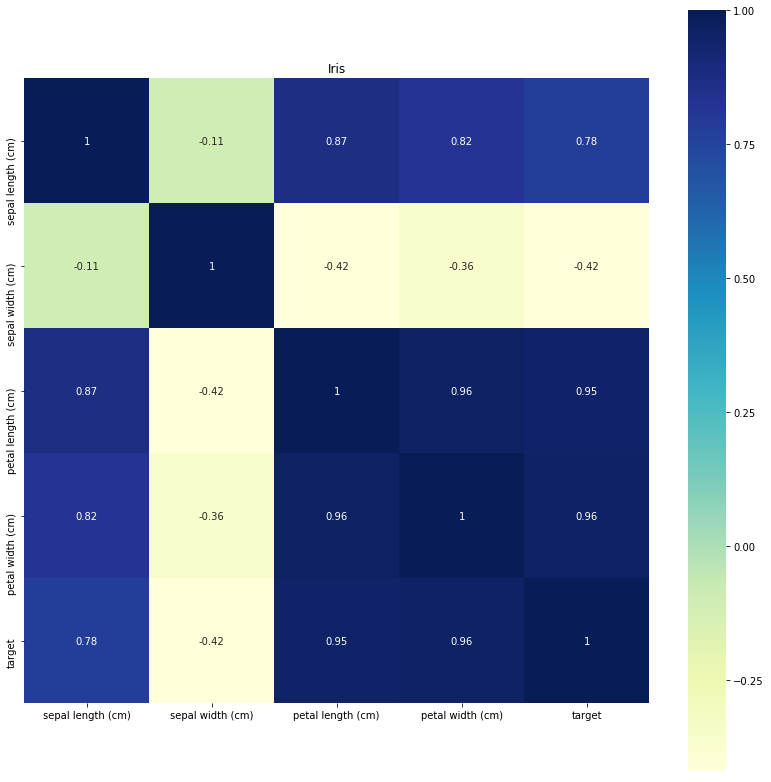

In [11]:
plt.figure(figsize=(14, 14))
plt.title('Iris')
sns.heatmap(df.astype(float).corr(), cmap='YlGnBu', square=True, annot=True)

In [12]:
from sklearn.model_selection import train_test_split

In [38]:
df.drop('target', axis=1).head()
#df['target']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.1)

In [42]:
y_train.head()

56     1
140    2
86     1
108    2
93     1
Name: target, dtype: int64

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
predict_result = clf.predict(X_test)
predict_result.tolist()

[2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1]

In [17]:
y_test.tolist()

[2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0, 2]

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
print(accuracy_score(predict_result, y_test) * 100, '%')

93.33333333333333 %


In [20]:
from sklearn.tree import export_graphviz
import graphviz

In [21]:
dot_data = export_graphviz(clf, 
                           out_file=None, 
                           feature_names=iris.feature_names, 
                           class_names=iris.target_names,
                           rounded=True, special_characters=True)

In [22]:
graph = graphviz.Source(dot_data)

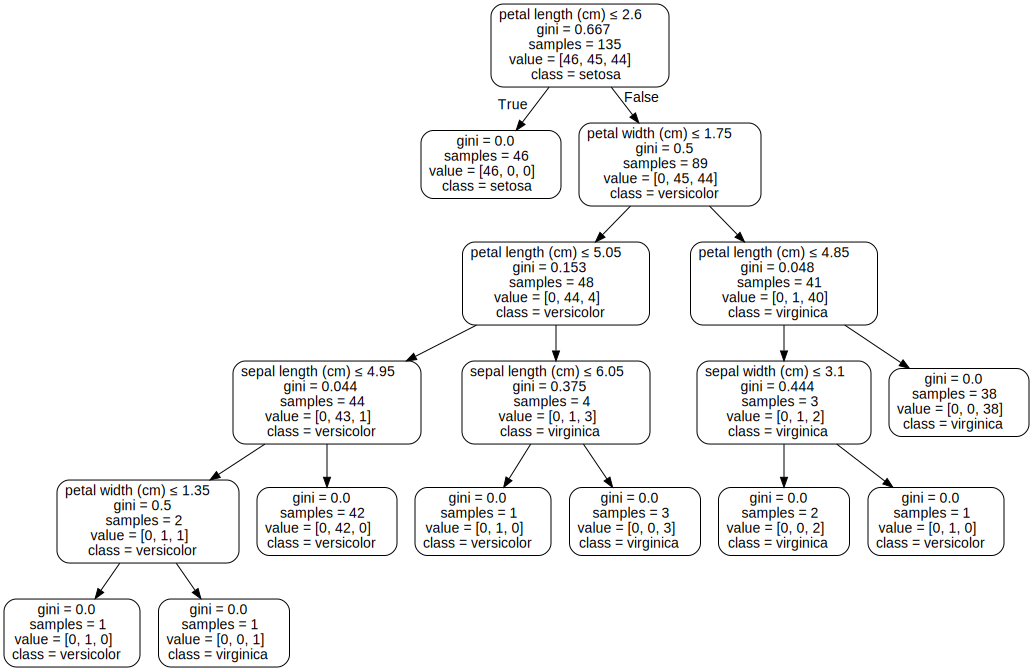

In [23]:
graph

In [24]:
# graph.render('round-table.gv', view=True)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
m = confusion_matrix(predict_result, y_test)
pd.DataFrame(m)

,0,1,2
0,4,0,0
1,0,5,1
2,0,0,5


In [27]:
clf.feature_importances_

array([0.02727722, 0.01481725, 0.55550786, 0.40239767])

In [28]:
list(zip(iris.feature_names, clf.feature_importances_))

[('sepal length (cm)', 0.02727721734965725),
 ('sepal width (cm)', 0.014817253868949621),
 ('petal length (cm)', 0.5555078551818405),
 ('petal width (cm)', 0.40239767359955264)]

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn_clf = KNeighborsClassifier()
knn_clf = knn_clf.fit(X_train, y_train)
print('predict: ', knn_clf.predict(X_test).tolist())
print('real   : ', y_test.tolist())

predict:  [2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1]
real   :  [2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0, 2]


In [31]:
accuracy_score(knn_clf.predict(X_test), y_test)

0.9333333333333333

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [33]:
scores = []
ks = []

for c in range(2, 6):
    clu = KMeans(n_clusters=c)
    clu.fit(iris.data)
    score = silhouette_score(iris.data, clu.labels_)
    scores.append(score)
    ks.append(c)

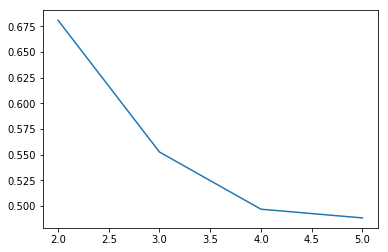

In [34]:
plt.plot(ks, scores)